# <h1> Parcial 2 - Ana María García Posso </h1>
<h3> Aprendizaje Automático y Análisis de Datos </h3>
<h3> 23 Abril - 2020 </h3>
NOTA: El analisis de resultados de todos los modelos se escribira luego del entrenamiento de cada iteracion, al igual que la comparacion entre las iteraciones.
Para la comparacion entre los resultados de las iteraciones, se tendra en cuenta principalmente la metrica de F1-Score, pues esta metrica es la mas completa de todas ya que hace una fusion entre precision y recall.
<h4> PRIMER ITERACION: </h4>
CONOCIMIENTO DE LOS DATOS:
Un grupo de expertos encontro una biblia con unos escritos muy antiguos.
Los expertos indicaron que esos escritos pertenecen a 12 autores distintos.De esta manera, dadas 10 tipos de caracteristicas distintas en cada escrito se busca poder adivinar a que autor pertenece.
Diciendolo en el contexto del conjunto de datos, dados 10 atributos F que representan las caracteristicas de los escritos, donde cada registro indica un registro distinto, se pretende adivinar a cual de las 12 categorias del atributo "Class" pertenecen.
PREPROCESAMIENTO DE LOS DATOS:
Como se puede ver en las proximas celdas, para el procesamiento de los datos se realizo lo siguiente:
1- Se eliminaron los datos del atributo F2 cuyo valor fuese mayor a 350, pues considero que este ya es un valor demasiado alejado del rango en el que se mueven la gran mayoria de datos.
2- Debido a la alta correlacion entre F6 y F10 vista en el mapa de calor, se tomo la decision de eliminar el atributo F10 y no el F6 debido a que el atributo F10 tiene menos correlacion con el resto de atributos.
3- Ya que el conjunto de datos es un conjunto tan desbalanceado, se tomo la decision de balancearlos de manera que todas las categorias queden con una cantidad exacta de 200 datos cada una.
Finalmente se decidio que la tecnica que produce mejor desempeño fue la de perceptron multicapa.
<h4> SEGUNDA ITERACION: </h4>
Lo que se cambio en esta iteracion para mejorar los resultados de la primer iteracion fue el balanceo de los datos. Esta vez el balanceo se hizo con 800 datos de cada categoria. Esto se decidio explorar debido a que este es un valor mas alto donde no se pierden tantos datos como en la primer iteracion y esto implica una mejor prediccion.
<h4> TERCER ITERACION: </h4>
En esta iteracion se trabajo con el mismo conjunto de datos de la primer iteracion cuyo balanceo fue de 800 datos. Se realizaron las siguientes mejoras:
1- Separacion del conjunto de entrenamiento y test, dejando ahora el conjunto de entrenamiento mas grande que antes para que el modelo pueda hacer una mejor prediccion. Se cambio a una separacion con un 80% para entrenamiento y un 20% para test.
2- Variacion de las capas de las iteraciones anteriores, de forma que se realizaron multiples pruebas cambiando tanto el tamaño de las capas como la cantidad de capas. Para una mejor prediccion se utilizo la funcion gridSearchCV la cual ayudo a visualizar cual era la capa que mejor se aplicaba en la prediccion.
Estas mejoras se decidieron explorar debido a que en este modelo en particular, la eleccion de la cantidad y el tamaño de cada capa es algo que puede aproximarse a través de multiples pruebas que el programador realice.

In [32]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

train = pd.read_csv('avila-tr.txt',sep=',', header=None, na_values="?")
test = pd.read_csv('avila-ts.txt',sep=',', header=None, na_values="?")
data = pd.concat([train, test])

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)

data.columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [33]:
#Cuál es el número de registros?
shape = data.shape
shape

(20867, 11)

In [34]:
#Cual es el tipo de los atributos?
data. dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10      float64
Class     object
dtype: object

In [35]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


In [36]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

0

In [37]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()
#Debido a que no existe ningun registro faltante, no se eliminara nada Ni se cambiaran por la media

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
Class    0
dtype: int64

In [38]:
data.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
F1,1.000000,-0.046363,0.036442,-0.057191,0.447930,-0.053406,-0.026103,-0.057518,0.081785,-0.013904
F2,-0.046363,1.000000,0.300381,0.000425,-0.085892,0.296413,0.459383,0.040535,0.231004,-0.031986
F3,0.036442,0.300381,1.000000,0.144168,0.011871,0.034247,0.185502,0.032930,0.120078,-0.057389
F4,-0.057191,0.000425,0.144168,1.000000,0.096447,0.266778,0.043836,0.358603,0.294643,0.327626
F5,0.447930,-0.085892,0.011871,0.096447,1.000000,0.041697,0.019832,-0.065375,0.286023,0.144194
F6,-0.053406,0.296413,0.034247,0.266778,0.041697,1.000000,0.395452,-0.043804,0.148651,0.806490
F7,-0.026103,0.459383,0.185502,0.043836,0.019832,0.395452,1.000000,0.015823,0.176611,0.274931
F8,-0.057518,0.040535,0.032930,0.358603,-0.065375,-0.043804,0.015823,1.000000,0.519697,0.001312
F9,0.081785,0.231004,0.120078,0.294643,0.286023,0.148651,0.176611,0.519697,1.000000,0.192805
F10,-0.013904,-0.031986,-0.057389,0.327626,0.144194,0.806490,0.274931,0.001312,0.192805,1.000000


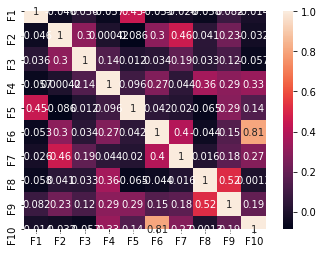

In [39]:
sns.heatmap(data.corr(), square=True, annot=True)

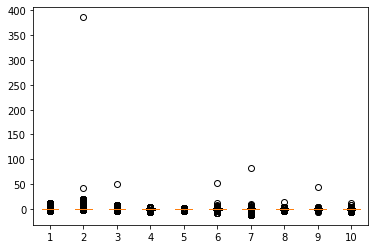

In [40]:
#Diagrama de cajas y bigotes para atributos numéricos (comparacion)
plt.boxplot((data['F1'],data['F2'],data['F3'],data['F4'],data['F5'],data['F6'],data['F7'],data['F8'],data['F9'],data['F10']))
plt.show()

In [3]:
#Como se puede ver en los diagramas, el atributo F2 tiene datos que estan muy alejados de la mayoria
#Estos registros se eliminaran
eliminar = []
for indice_fila, fila in data.iterrows():
    if(fila['F2']>=350):
        eliminar.append(indice_fila)
        
data = data.drop(eliminar,axis=0)
data
#ya que hay 3 registros menos que al inicio, significa que existian 3 registros con F2 mayor a 350

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [41]:
#Cuantos registros hay por cada categoria
print(data['Class'].value_counts())

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: Class, dtype: int64


In [42]:
# Convertir los atributos categoricos a numericos
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
print(data['Class'].value_counts())

0     8572
5     3923
4     2190
8     1663
10    1044
7     1039
6      893
3      705
11     533
2      206
9       89
1       10
Name: Class, dtype: int64


In [43]:
#Data1 sera el conjunto de datos que se trabajara en la primer iteracion del parcial
#Debido a que la correlacion entre F6 y F10 fue de 0.81, se toma la decision de eliminar el atributo F10
data1 = data
data1 = data1.drop(['F10'], axis=1)
data1

,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,85,76,140,511,37,133,192,16575,184,0
1,74,188,0,377,38,172,232,14561,185,0
2,53,106,69,150,38,139,174,3321,166,0
3,66,135,0,191,26,113,205,17233,198,0
4,82,186,36,383,38,129,201,9369,173,5
...,...,...,...,...,...,...,...,...,...,...
10432,52,92,66,534,38,93,176,17747,259,10
10433,85,166,45,414,38,106,200,10543,199,6
10434,58,168,60,354,38,175,192,2977,154,0
10435,70,169,55,362,38,93,166,10396,167,5


In [44]:
# Preparación de conjunto alterno con balanceo entre clases (Cada categoria tendra 200 datos)
g = data1.groupby('Class')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample((g.size().min())*20,replace=True).reset_index(drop=True)))
data1 = dataBal
data1

F1   F2   F3   F4  F5   F6   F7     F8   F9  Class
Class                                                        
0     0    55   69  127  542  32  157  192   3643  129      0
      1    61   91   76  311  38  123  182   2808  137      0
      2    82  167   64  115  31   27  186  13616   80      0
      3    82  111   34  381  38  145  192   6788  175      0
      4    83   81  167  388  37  110  196  14947  203      0
...        ..  ...  ...  ...  ..  ...  ...    ...  ...    ...
11    195  45   83  213  743  43   93  122  19558  234     11
      196  39  187   94  655  41  174  137   6332  175     11
      197  43   59  214  645  42   92  133  16456  247     11
      198  59   75  211  386  23   66  244   1157  110     11
      199  17   41  134  714  37  143  128  15430  236     11

[2400 rows x 10 columns]

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import statistics

#Acumuladores de Metricas de Perceptron Multicapa
mlpPrecision = []
mlpRecall = []
mlpF1score = []
mlpAccuracy = []
#Acumuladores de Metricas de Maquinas de Vectores de Soporte
svcPrecision = []
svcRecall = []
svcF1score = []
svcAccuracy = []
HOLDOUT = 10
for i in range(HOLDOUT):
    # Separacion de los datos en conjuntos de entrenamiento, validacion y prueba. Se trabaja sobre el conjunto balanceado
    #La separacion se hara con un 60% para entrenamiento y un 40% para test
    X_train, X_test, y_train, y_test = train_test_split(data1.drop(['Class'],axis=1), data1['Class'], test_size=0.4)
    
    #-----------------------------------------------PERCEPTRON MULTICAPA------------------------------------------------
    # Se crea el clasificador base
    mlp = MLPClassifier(max_iter=10000)

    # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = {
        'hidden_layer_sizes': [(5), (10), (50)],
        'activation': ['logistic', 'tanh', 'relu']}
    
    # Se realiza la estimacion de parametros, en clf queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, iid=False, cv=3, refit=True)
    clf.fit(X_train,y_train)

    # Se hace la prediccion sobre los datos de prueba
    predClf = clf.predict(X_test)
    
    #SE CALCULAN LAS METRICAS
    precisionM = precision_score(y_test,predClf, labels=data1['Class'],average='weighted')
    recallM = recall_score(y_test,predClf, labels=data1['Class'],average='weighted')
    f1M = f1_score(y_test,predClf, labels=data1['Class'],average='weighted')
    print("F1-SCORE MULTICAPA",f1M)
    accuracyM = accuracy_score(y_test, predClf)
    mlpPrecision.append(precisionM)
    mlpRecall.append(recallM)
    mlpF1score.append(f1M)
    mlpAccuracy.append(accuracyM)
    
    #--------------------------------------------MAQUINA DE VECTORES DE SOPORTE-----------------------------------------
    #Se crea el clasificador
    svc = SVC(gamma='auto',max_iter=10000)
    svc.fit(X_train,y_train)
    
    # Se hace la prediccion sobre los datos de prueba
    predSvc = svc.predict(X_test)
    
    #SE CALCULAN LAS METRICAS
    precisionS = precision_score(y_test,predSvc, labels=data1['Class'],average='weighted')
    recallS = recall_score(y_test,predSvc, labels=data1['Class'],average='weighted')
    f1S = f1_score(y_test,predSvc, labels=data1['Class'],average='weighted')
    print("F1-SCORE VECTORES",f1S)
    accuracyS = accuracy_score(y_test, predSvc)
    svcPrecision.append(precisionS)
    svcRecall.append(recallS)
    svcF1score.append(f1S)
    svcAccuracy.append(accuracyS)

print("REPORTE DEL HOLDOUT")
print("\nPerceptron Multicapa\n")
print("Media\n")
print("Precision:\t",statistics.mean(mlpPrecision))
print("Recall:\t",statistics.mean(mlpRecall))
print("F1-score:\t",statistics.mean(mlpF1score))
print("Accuracy:\t",statistics.mean(mlpAccuracy))
print("\nDesviaciones\n")
print("Precision:\t",statistics.stdev(mlpPrecision))
print("Recall:\t",statistics.stdev(mlpRecall))
print("F1-score:\t",statistics.stdev(mlpF1score))
print("Accuracy:\t",statistics.stdev(mlpAccuracy))

print("\nMaquinas de Vectores de Soporte\n")
print("Media\n")
print("Precision:\t",statistics.mean(svcPrecision))
print("Recall:\t",statistics.mean(svcRecall))
print("F1-score:\t",statistics.mean(svcF1score))
print("Accuracy:\t",statistics.mean(svcAccuracy))
print("\nDesviaciones\n")
print("Precision:\t",statistics.stdev(svcPrecision))
print("Recall:\t",statistics.stdev(svcRecall))
print("F1-score:\t",statistics.stdev(svcF1score))
print("Accuracy:\t",statistics.stdev(svcAccuracy))

F1-SCORE MULTICAPA 0.39958970063956395
F1-SCORE VECTORES 0.3479008221212689
F1-SCORE MULTICAPA 0.40505055199262124
F1-SCORE VECTORES 0.33247312417530034
F1-SCORE MULTICAPA 0.40764258726104663
F1-SCORE VECTORES 0.373417121892542
F1-SCORE MULTICAPA 0.3870387759572412
F1-SCORE VECTORES 0.34783703678826333
F1-SCORE MULTICAPA 0.2827452106754699
F1-SCORE VECTORES 0.3329315211771717


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-SCORE MULTICAPA 0.2616026935799453
F1-SCORE VECTORES 0.3468605454180409
F1-SCORE MULTICAPA 0.4583706443007233
F1-SCORE VECTORES 0.33853366323225237
F1-SCORE MULTICAPA 0.3439324597922961
F1-SCORE VECTORES 0.34040875422532585
F1-SCORE MULTICAPA 0.2281241760825189
F1-SCORE VECTORES 0.3533941344710667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-SCORE MULTICAPA 0.36337071331257736
F1-SCORE VECTORES 0.34183973685135205
REPORTE DEL HOLDOUT

Perceptron Multicapa

Media

Precision:	 0.42976656155577153
Recall:	 0.40947916666666667
F1-score:	 0.35374675135940037
Accuracy:	 0.40947916666666667

Desviaciones

Precision:	 0.0423312849379184
Recall:	 0.07783270939653954
F1-score:	 0.0739328926249761
Accuracy:	 0.07783270939653954

Maquinas de Vectores de Soporte

Media

Precision:	 0.9313131893761415
Recall:	 0.33125
F1-score:	 0.3455596460352584
Accuracy:	 0.33125

Desviaciones

Precision:	 0.001820185426813583
Recall:	 0.009394270318381023
F1-score:	 0.011880135429673828
Accuracy:	 0.009394270318381023


<h3> Primer Iteracion - Analisis de Resultados </h3>
Se realizaron multiples ejecuciones de los modelos anteriores y en cada una de estas siempre fue mejor el modelo perceptron multicapa, a pesar de que en algunos casos la diferencia no fuese mucha como se muestra anteriormente.
Por esta razon se decidio que el modelo que produce mejor desempeño (teniendo en cuenta la metrica F1-Score) fue el perceptron multicapa.

In [46]:
#----------------------------------------SEGUNDA ITERACION----------------------------------------------------------------
#Data2 sera el conjunto de datos que se trabajara en la segunda iteracion del parcial
#Se mantiene la decision de la primer iteracion de eliminar el atributo F10
data2 = data
data2 = data2.drop(['F10'], axis=1)
data2

,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,85,76,140,511,37,133,192,16575,184,0
1,74,188,0,377,38,172,232,14561,185,0
2,53,106,69,150,38,139,174,3321,166,0
3,66,135,0,191,26,113,205,17233,198,0
4,82,186,36,383,38,129,201,9369,173,5
...,...,...,...,...,...,...,...,...,...,...
10432,52,92,66,534,38,93,176,17747,259,10
10433,85,166,45,414,38,106,200,10543,199,6
10434,58,168,60,354,38,175,192,2977,154,0
10435,70,169,55,362,38,93,166,10396,167,5


In [47]:
# Preparación de conjunto alterno con balanceo entre clases (Cada categoria tendra 800 datos)
g = data2.groupby('Class')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample((g.size().min())*80,replace=True).reset_index(drop=True)))
data2 = dataBal
data2

F1   F2   F3   F4  F5   F6   F7     F8   F9  Class
Class                                                         
0     0     71  116   98  650  37  205  209   1125  109      0
      1     70   66  178  498  38  117  190   6232  150      0
      2     74  107  134  162  38  117  201  18401  184      0
      3    106   97    0    6  38   32   18     99   21      0
      4     75  159   58  528  37  123   91  14864  185      0
...        ...  ...  ...  ...  ..  ...  ...    ...  ...    ...
11    795   39  187   94  655  41  131  109   1133  119     11
      796   43   59  214  645  42   57  217  18446  243     11
      797   45   83  213  743  43  127  183  19248  225     11
      798   17   41  134  714  37  151   82   8220  215     11
      799   17   41  134  714  37  151   82   8220  215     11

[9600 rows x 10 columns]

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statistics

#Acumuladores de Metricas de Perceptron Multicapa
mlpPrecision = []
mlpRecall = []
mlpF1score = []
mlpAccuracy = []

HOLDOUT = 10
for i in range(HOLDOUT):
    # Separacion de los datos en conjuntos de entrenamiento, validacion y prueba. Se trabaja sobre el conjunto balanceado
    #La separacion se hara con un 60% para entrenamiento y un 40% para test
    X_train, X_test, y_train, y_test = train_test_split(data2.drop(['Class'],axis=1), data2['Class'], test_size=0.4)
    
    #-----------------------------------------------PERCEPTRON MULTICAPA------------------------------------------------
    # Se crea el clasificador base
    mlp = MLPClassifier(max_iter=10000)

    # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = {
        'hidden_layer_sizes': [(5), (10), (50)],
        'activation': ['logistic', 'tanh', 'relu']}
    
    # Se realiza la estimacion de parametros, en clf queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, iid=False, cv=3, refit=True)
    clf.fit(X_train,y_train)

    # Se hace la prediccion sobre los datos de prueba
    predClf = clf.predict(X_test)
    
    #SE CALCULAN LAS METRICAS
    precisionM = precision_score(y_test,predClf, labels=data2['Class'],average='weighted')
    recallM = recall_score(y_test,predClf, labels=data2['Class'],average='weighted')
    f1M = f1_score(y_test,predClf, labels=data2['Class'],average='weighted')
    print("F1-SCORE",f1M)
    accuracyM = accuracy_score(y_test, predClf)
    mlpPrecision.append(precisionM)
    mlpRecall.append(recallM)
    mlpF1score.append(f1M)
    mlpAccuracy.append(accuracyM)
    
print("REPORTE DEL HOLDOUT")
print("\nPerceptron Multicapa\n")
print("Media\n")
print("Precision:\t",statistics.mean(mlpPrecision))
print("Recall:\t",statistics.mean(mlpRecall))
print("F1-score:\t",statistics.mean(mlpF1score))
print("Accuracy:\t",statistics.mean(mlpAccuracy))
print("\nDesviaciones\n")
print("Precision:\t",statistics.stdev(mlpPrecision))
print("Recall:\t",statistics.stdev(mlpRecall))
print("F1-score:\t",statistics.stdev(mlpF1score))
print("Accuracy:\t",statistics.stdev(mlpAccuracy))

F1-SCORE 0.6210122838724459
F1-SCORE 0.5799441945051718
F1-SCORE 0.5906957572744073
F1-SCORE 0.6660623085317786
F1-SCORE 0.6303916203362285
F1-SCORE 0.5810166840061353
F1-SCORE 0.5800405967064074
F1-SCORE 0.578875087930898
F1-SCORE 0.5994383387638696
F1-SCORE 0.6005067041519708
REPORTE DEL HOLDOUT

Perceptron Multicapa

Media

Precision:	 0.6159978200338725
Recall:	 0.6226302083333333
F1-score:	 0.6027983576079313
Accuracy:	 0.6226302083333333

Desviaciones

Precision:	 0.03127321278300626
Recall:	 0.027531583141262944
F1-score:	 0.02856857183611692
Accuracy:	 0.027531583141262944


<h3> Segunda Iteracion - Analisis de Resultados </h3>
Debido a que en la primer iteracion la mayoria de las categorias tenian volumenes de datos por encima de los 300 que fue el punto donde se balancearon, el modelo no pudo predecir muy bien.
Dado esto, se tomo la decision de aumentar los datos de balanceo dejandolos asi en 800 datos cada uno.
Se hizo la prueba con volumenes hasta 1300 cada categoria, sin embargo la mejora comparada con los 800 datos no fue significativa.
<h4> Comparacion con la primer iteracion </h4>
El resultado promedio del F1-score del modelo multicapa de la primer iteracion obtuvo un resultado de 0.35 aproximadamente, mientras el actual obtuvo 0.6
Esto representa una mejora en la segunda iteracion de aproximadamente un 25% mas que en la primer iteracion.

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statistics

#Acumuladores de Perceptron Multicapa
mlpPrecision = []
mlpRecall = []
mlpF1score = []
mlpAccuracy = []

HOLDOUT = 10
for i in range(HOLDOUT):
    # Separacion de los datos en conjuntos de entrenamiento, validacion y prueba. Se trabaja sobre el conjunto balanceado
    #A diferencia de las separaciones anteriores, esta se hara con un 80% para entrenamiento y 20% para test
    X_train, X_test, y_train, y_test = train_test_split(data2.drop(['Class'],axis=1), data2['Class'], test_size=0.2)
    
    #-----------------------------------------------PERCEPTRON MULTICAPA------------------------------------------------
    # Se crea el clasificador base
    mlp = MLPClassifier(max_iter=10000)

    # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = {
        'hidden_layer_sizes': [(150), (200), (250)],
        'activation': ['logistic', 'tanh', 'relu']}
    
    # Se realiza la estimacion de parametros, en clf queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, iid=False, cv=3, refit=True)
    clf.fit(X_train,y_train)

    # Se hace la prediccion sobre los datos de prueba
    predClf = clf.predict(X_test)
    #La funcion best_params_ ayuda a visualizar cual de los parametros fue el mas indicado para la prediccion
    #del modelo. Luego de multiples pruebas, se determino que las capas que mejor funcionaban fueron las
    #de 150,200 y 250.
    print("El mejor parametro es:",clf.best_params_)
    
    #SE CALCULAN LAS METRICAS
    precisionM = precision_score(y_test,predClf, labels=data2['Class'],average='weighted')
    recallM = recall_score(y_test,predClf, labels=data2['Class'],average='weighted')
    f1M = f1_score(y_test,predClf, labels=data2['Class'],average='weighted')
    print("F1-SCORE",f1M)
    accuracyM = accuracy_score(y_test, predClf)
    mlpPrecision.append(precisionM)
    mlpRecall.append(recallM)
    mlpF1score.append(f1M)
    mlpAccuracy.append(accuracyM)
    
print("REPORTE DEL HOLDOUT")
print("\nPerceptron Multicapa\n")
print("Media\n")
print("Precision:\t",statistics.mean(mlpPrecision))
print("Recall:\t",statistics.mean(mlpRecall))
print("F1-score:\t",statistics.mean(mlpF1score))
print("Accuracy:\t",statistics.mean(mlpAccuracy))
print("\nDesviaciones\n")
print("Precision:\t",statistics.stdev(mlpPrecision))
print("Recall:\t",statistics.stdev(mlpRecall))
print("F1-score:\t",statistics.stdev(mlpF1score))
print("Accuracy:\t",statistics.stdev(mlpAccuracy))

El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 250}
F1-SCORE 0.704279067978123
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 250}
F1-SCORE 0.6871693339259203
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 150}
F1-SCORE 0.6592168156713532
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 250}
F1-SCORE 0.6555078288037111
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 250}
F1-SCORE 0.6560721544826711
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 250}
F1-SCORE 0.662953955671695
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 200}
F1-SCORE 0.6572540435387592
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 250}
F1-SCORE 0.697650756247481
El mejor parametro es: {'activation': 'logistic', 'hidden_layer_sizes': 150}
F1-SCORE 0.7122274973037138
El mejor parametro es: {'activation': 'logistic', 'hidden_

<h3> Tercera Iteracion - Analisis de Resultados </h3>
En esta iteracion se trabajo con el conjunto de datos de la segunda iteracion. Posteriormente se realizaron pruebas ya no sobre el conjunto de datos sino sobre la separacion de los conjuntos de entrenamiento y test y sobre el modelo de prediccion.
Luego de multiples pruebas, se llego a la conclusion de que los valores cuyas predicciones fueron mejores son los mencionados anteriormente.
<h4> Comparacion con la segunda iteracion </h4>
El resultado promedio del F1-score del modelo multicapa de la segunda iteracion obtuvo un resultado de 0.6, mientras el actual obtuvo 0.68 aproximadamente.
Esto representa una mejora en la tercera iteracion de aproximadamente un 8% mas que en la segunda iteracion.

<h4> Comparacion Final </h4>
Finalmente, al comparar el resultado inicial con el final, podemos ver que hubo una mejora del 33% en total a lo largo de las 3 iteraciones realizadas en este taller.

<h3> Conclusiones del Proceso </h3>
En este taller se pudieron llevar a la práctica multiples temas vistos en clase como lo son el procesamiento de datos, el entrenamiento de modelos, análisis de las métricas, etc.
Se pudo hacer un mejor acercamiento con el modelo perceptron multicapa, realizando pruebas con las multiples capas que este modelo puede tener y comparando cual es la distribucion que mejor predice.
Luego de realizar este taller, se aprendió que no siempre el entrenamiento de los modelos se debe hacer de una misma manera y con unas pocas pruebas, sino que realizando análisis más profundos y dedicando más tiempo a la búsqueda de mejoras, se pueden mejorar en un buen porcentaje el entrenamiento de los modelos.
Finalmente, considero que en este taller la técnica principal fue el realizar multiples pruebas, pues personalmente tuve que realizar muchos cambios, ejecuciones y comparaciones para encontrar cuáles son las mejoras que se le pueden hacer al conjunto de datos que yo he procesado teniendo en cuenta sus características.
